In [116]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mlrose_hiive as mlrose
import mlrose as mlrose_old
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
import time

from mlrose_hiive.algorithms.decay import GeomDecay


#Random State
rs = 614

In [2]:
class Data():
    def dataAllocation(self, path):
        df = pd.read_csv(path)
        x_data = df.iloc[:, :-1]
        y_data = df.iloc[:, -1 ]
        return x_data,y_data

    def trainSets(self,x_data,y_data):
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = rs, shuffle = True)
        return x_train, x_test, y_train, y_test

In [3]:
dataset = Data()
x1_data,y1_data = dataset.dataAllocation('data/pima-indians-diabetes.csv')
x1_train, x1_test, y1_train, y1_test = dataset.trainSets(x1_data,y1_data)
scaler = StandardScaler()
scaled_x1_train = scaler.fit_transform(x1_train)
scaled_x1_test = scaler.transform(x1_test)

In [4]:
algorithms = ['random_hill_climb', 'simulated_annealing', 'genetic_alg']
algorithm = algorithms[0]

In [5]:
results = []
for i in range(1, 5000, 100):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithm, max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        

[1, 'random_hill_climb', 0.521415270018622, 0.49783549783549785, 0.38947368421052625]
[101, 'random_hill_climb', 0.6089385474860335, 0.6190476190476191, 0.4358974358974359]
[201, 'random_hill_climb', 0.7411545623836127, 0.7056277056277056, 0.5342465753424657]
[301, 'random_hill_climb', 0.7653631284916201, 0.7272727272727273, 0.5190839694656489]
[401, 'random_hill_climb', 0.7839851024208566, 0.7532467532467533, 0.6013986013986014]
[501, 'random_hill_climb', 0.7914338919925512, 0.7445887445887446, 0.593103448275862]
[601, 'random_hill_climb', 0.7914338919925512, 0.7229437229437229, 0.5675675675675677]
[701, 'random_hill_climb', 0.7951582867783985, 0.7359307359307359, 0.5793103448275863]
[801, 'random_hill_climb', 0.7932960893854749, 0.7316017316017316, 0.5507246376811594]
[901, 'random_hill_climb', 0.8044692737430168, 0.7316017316017316, 0.5507246376811594]
[1001, 'random_hill_climb', 0.8026070763500931, 0.7359307359307359, 0.5611510791366906]
[1101, 'random_hill_climb', 0.80819366852886

In [6]:
df = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])

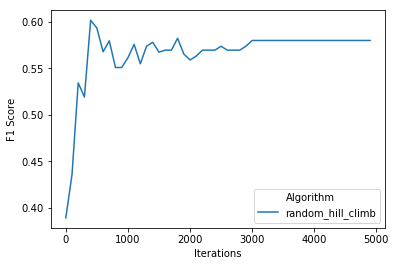

In [7]:
sns.lineplot(data=df, x="Iterations", y="F1 Score", hue="Algorithm")

In [9]:
df.to_csv("nn_opts_rhc.csv", index=False)

In [ ]:
# Randomized Hill Climbing with 10 restarts

In [15]:
results = []
for i in range(1, 11):
    model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                algorithm=algorithm, max_iters=3000,
                                bias=True, is_classifier=True, learning_rate=0.1,
                                early_stopping=True, clip_max=5, max_attempts=100,
                                restarts=10)
    model.fit(scaled_x1_train, y1_train)
    y_train_pred = model.predict(scaled_x1_train)
    y_train_accuracy = accuracy_score(y1_train, y_train_pred)

    y_test_pred = model.predict(scaled_x1_test)
    y_test_accuracy = accuracy_score(y1_test, y_test_pred)

    f1score = f1_score(y1_test, y_test_pred)
    results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
    print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])


[1, 'random_hill_climb', 0.8100558659217877, 0.7402597402597403, 0.5774647887323944]
[2, 'random_hill_climb', 0.8100558659217877, 0.7142857142857143, 0.5217391304347826]
[3, 'random_hill_climb', 0.8175046554934823, 0.7186147186147186, 0.5323741007194244]
[4, 'random_hill_climb', 0.819366852886406, 0.7359307359307359, 0.5547445255474452]
[5, 'random_hill_climb', 0.8026070763500931, 0.7186147186147186, 0.49612403100775193]
[6, 'random_hill_climb', 0.813780260707635, 0.7445887445887446, 0.5693430656934306]
[7, 'random_hill_climb', 0.7951582867783985, 0.7142857142857143, 0.484375]
[8, 'random_hill_climb', 0.7951582867783985, 0.7316017316017316, 0.5303030303030304]
[9, 'random_hill_climb', 0.8063314711359404, 0.7359307359307359, 0.5611510791366906]
[10, 'random_hill_climb', 0.8119180633147114, 0.7316017316017316, 0.557142857142857]


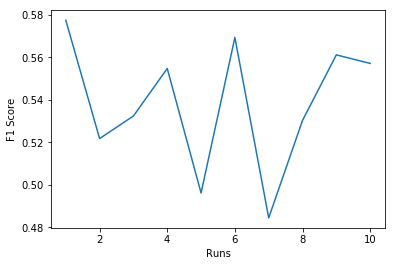

In [16]:
runs = pd.DataFrame(results, columns=["Runs", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])
sns.lineplot(data=runs, x="Runs", y="F1 Score")


In [17]:
runs.to_csv('nn_opts_rhc_runs.csv', index=False)

In [ ]:
# Analyze Decay Rate for simulated_annealing

In [50]:
results = []
algorithm = algorithms[1]
for i in range(1, 5000, 100):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithm, max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
     

[1, 'simulated_annealing', 0.521415270018622, 0.4935064935064935, 0.38743455497382195]
[101, 'simulated_annealing', 0.5195530726256983, 0.5064935064935064, 0.4]
[201, 'simulated_annealing', 0.4748603351955307, 0.43722943722943725, 0.38679245283018865]
[301, 'simulated_annealing', 0.4934823091247672, 0.45021645021645024, 0.4147465437788019]
[401, 'simulated_annealing', 0.4823091247672253, 0.45021645021645024, 0.42533936651583715]
[501, 'simulated_annealing', 0.5605214152700186, 0.5411255411255411, 0.5092592592592593]
[601, 'simulated_annealing', 0.6443202979515829, 0.6147186147186147, 0.5240641711229946]
[701, 'simulated_annealing', 0.6871508379888268, 0.6536796536796536, 0.5652173913043479]
[801, 'simulated_annealing', 0.7262569832402235, 0.7142857142857143, 0.5925925925925926]
[901, 'simulated_annealing', 0.7374301675977654, 0.670995670995671, 0.5777777777777777]
[1001, 'simulated_annealing', 0.7541899441340782, 0.6926406926406926, 0.5798816568047337]
[1101, 'simulated_annealing', 0.7

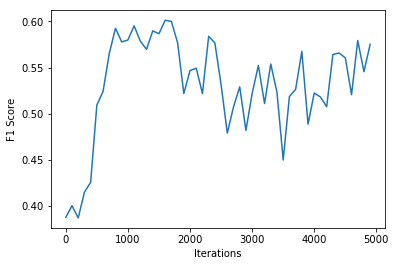

In [51]:
df = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])
sns.lineplot(data=df, x="Iterations", y="F1 Score")
df.to_csv("nn_opts_sa.csv", index=False)

In [52]:
results = []
algorithm = algorithms[2]
for i in range(1, 600, 100):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithm, max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs, pop_size=200, mutation_prob = 0.1)

                                 
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
     

[1, 'genetic_alg', 0.6424581005586593, 0.658008658008658, 0.07058823529411765]
[101, 'genetic_alg', 0.7728119180633147, 0.7316017316017316, 0.5921052631578947]
[201, 'genetic_alg', 0.7914338919925512, 0.7359307359307359, 0.5793103448275863]
[301, 'genetic_alg', 0.7895716945996276, 0.7359307359307359, 0.5734265734265734]
[401, 'genetic_alg', 0.7970204841713222, 0.7272727272727273, 0.5655172413793104]
[501, 'genetic_alg', 0.7914338919925512, 0.7489177489177489, 0.591549295774648]


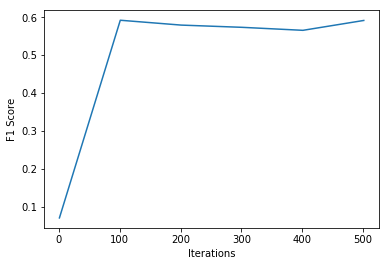

In [53]:
df = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])
sns.lineplot(data=df, x="Iterations", y="F1 Score")
df.to_csv("nn_opts_ga.csv", index=False)

In [5]:
results = []
algorithm = algorithms[2]
for i in range(50, 500, 50):
    model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithm, max_iters=150,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs, pop_size=i, mutation_prob = 0.1)
    model.fit(scaled_x1_train, y1_train)
    y_train_pred = model.predict(scaled_x1_train)
    y_train_accuracy = accuracy_score(y1_train, y_train_pred)

    y_test_pred = model.predict(scaled_x1_test)
    y_test_accuracy = accuracy_score(y1_test, y_test_pred)

    f1score = f1_score(y1_test, y_test_pred)
    results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
    print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])


[50, 'genetic_alg', 0.7895716945996276, 0.7445887445887446, 0.6040268456375839]
[100, 'genetic_alg', 0.7858472998137802, 0.7402597402597403, 0.5774647887323944]
[150, 'genetic_alg', 0.7802607076350093, 0.7705627705627706, 0.6131386861313869]
[200, 'genetic_alg', 0.7783985102420856, 0.7316017316017316, 0.5866666666666667]
[250, 'genetic_alg', 0.7783985102420856, 0.7012987012987013, 0.5306122448979592]
[300, 'genetic_alg', 0.7783985102420856, 0.7229437229437229, 0.5555555555555556]
[350, 'genetic_alg', 0.7914338919925512, 0.7532467532467533, 0.583941605839416]
[400, 'genetic_alg', 0.7839851024208566, 0.7402597402597403, 0.5454545454545454]
[450, 'genetic_alg', 0.7802607076350093, 0.7402597402597403, 0.5588235294117648]


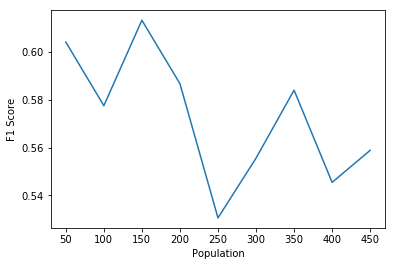

In [7]:
df = pd.DataFrame(results, columns=["Population", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])
sns.lineplot(data=df, x="Population", y="F1 Score")
df.to_csv("nn_opts_ga_population.csv", index=False)

# Flip Flop Analysis

In [122]:
def rhc(problem_fit, problem_name, max_iters= 100):
    start = time.time()
    fitness_score = mlrose.random_hill_climb(problem_fit, max_attempts=100, max_iters= max_iters, restarts=10, random_state = rs)[1]
    return [max_iters, "random_hill_climb", problem_name,fitness_score, time.time()-start]

def sa(problem_fit, problem_name, max_iters= 100):
    start = time.time()
    fitness_score = mlrose.simulated_annealing(problem_fit, max_attempts=100, max_iters= max_iters, random_state = rs)[1]
    return [max_iters, "simulated_annealing", problem_name,fitness_score, time.time()-start]

def ga(problem_fit, problem_name, max_iters= 100):
    start = time.time()
    fitness_score = mlrose.genetic_alg(problem_fit, max_attempts=100, max_iters= max_iters, pop_size= 200, mutation_prob=0.1, random_state = rs)[1]
    return [max_iters, "genetic_alg", problem_name,fitness_score, time.time()-start]

def mimic(problem_fit, problem_name, max_iters= 100):
    start = time.time()
    fitness_score = mlrose_old.mimic(problem_fit, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=max_iters, curve=False, random_state=rs, fast_mimic=True)[1]
    return [max_iters, "mimic", problem_name,fitness_score, time.time()-start]

fitness = mlrose.FlipFlop()
results = []
edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
problems_name = ["Flip Flop", "One Max", "Max-K Color"]

fitness_functions = [mlrose.FlipFlop(), mlrose.OneMax(), mlrose.MaxKColor(edges)]

problems = [mlrose.DiscreteOpt(length = 100, fitness_fn = fitness_function, maximize=True, max_val = 2) for fitness_function in fitness_functions]
for j in range(len(problems)):
    for i in range(0, 100, 10):
        results.append(rhc(problems[j], problems_name[j], max_iters= i))
        results.append(sa(problems[j], problems_name[j], max_iters= i))
        results.append(ga(problems[j], problems_name[j], max_iters= i))
        results.append(mimic(problems[j], problems_name[j], max_iters= i))
        print(i, end=" ")



0 10 20 30 40 50 60 70 80 90 0 10 20 30 40 50 60 70 80 90 0 10 20 30 40 50 60 70 80 90 

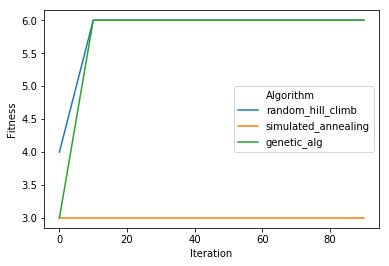

In [123]:
df = pd.DataFrame(results, columns=["Iteration", "Algorithm", "Problem","Fitness", "Time"])
sns.lineplot(data=df[df['Problem']==problems_name[2]], x="Iteration", y="Fitness", hue="Algorithm")


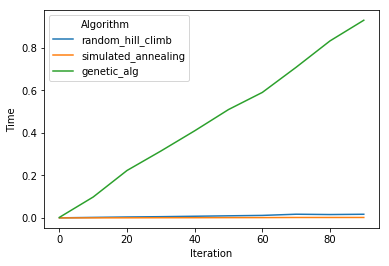

In [102]:
sns.lineplot(data=df[df['Problem']==problems_name[1]], x="Iteration", y="Time", hue="Algorithm")


In [103]:
df.to_csv("problems.csv", index=False)